In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno


# Statistical analysis
from scipy.stats import ttest_ind
import statistics as s

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the diabetes data set
data = pd.read_csv("/content/diabetes.csv")

In [3]:
#checking out the first 10 rows
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
#checking out the data types of all the features
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
#Checking out the number of records in the dataset
len(data)

768

In [6]:
#number of unique values for each feature
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [7]:
#printing the dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


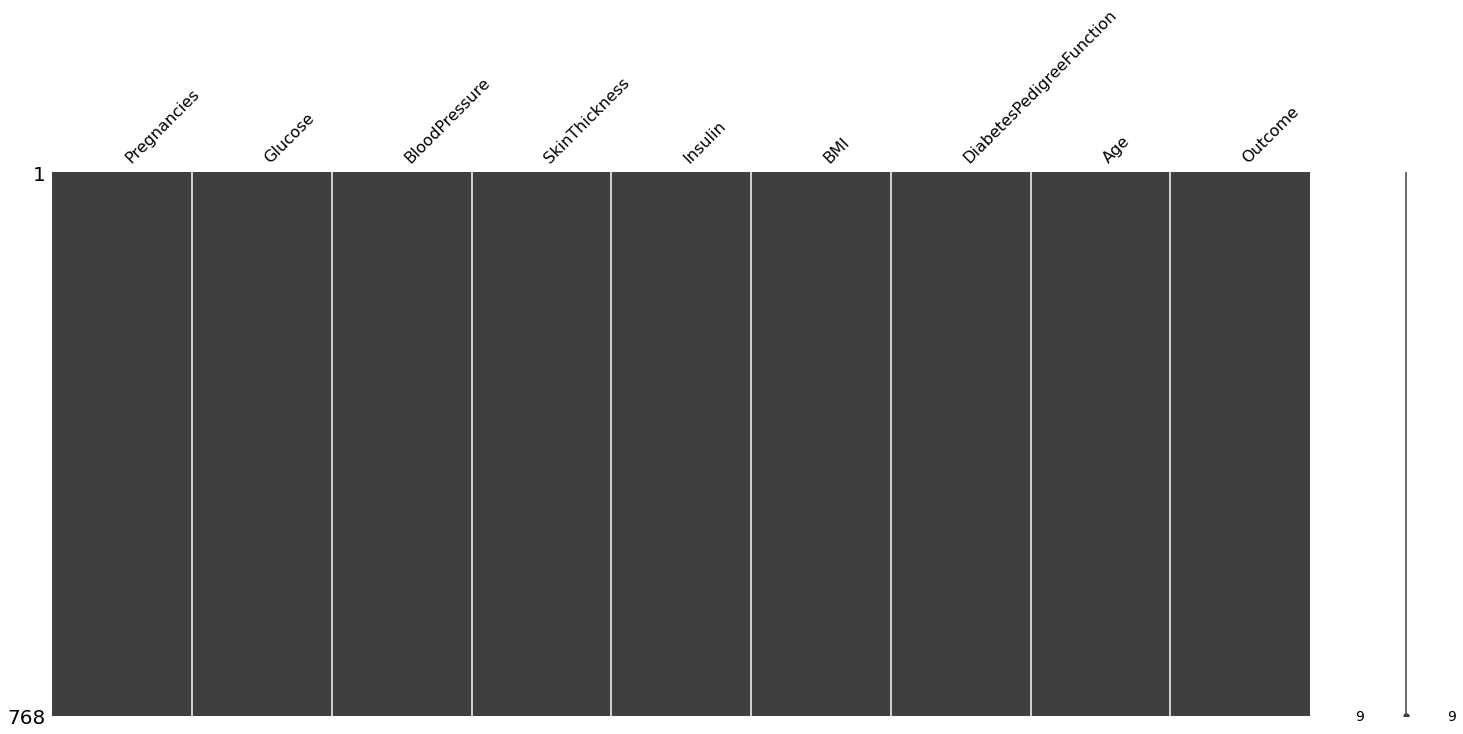

In [8]:
#Plotting the missing number matrix in order to check if there are any missing values in the dataset
missingno.matrix(data)

In [9]:
#checking for outliers in the pregnancies feature
data['Pregnancies'].value_counts().tail(5)

13    10
12     9
14     2
15     1
17     1
Name: Pregnancies, dtype: int64

In [10]:
#printing out the rows where glucose feature has value zero which is an outlier, similarly checking for all the features
data.loc[data['Glucose'] == 0, :].head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [11]:
data.loc[data['BloodPressure'] == 0, :].head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1


In [12]:
data.loc[data['SkinThickness'] == 0, :].head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0


In [13]:
data.loc[data['Insulin'] == 0, :].head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0


In [14]:
data.loc[data['BMI'] == 0, :].head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0


In [15]:
#splitting the dataset into two based on the outcome so that we can fill in the zeroes with the appropriate value 
data0 = data[data['Outcome'] == 0]
data1 = data[data['Outcome'] == 1]

In [16]:
#Filling in the zeroes for each attribute and for each class seperately
#filling in the zeroes in the BMI column with the mode of the values that corresponds to its outcome i.e. zeroes in the 
#data0 which corresponds to the outcome class zero are filled with the mode of that particular column in data0 and the same 
#goes for data1 and for the rest of the attributes that has zeroes

a = data0['BMI'].value_counts().index.tolist()[1]
data0['BMI'] = data0['BMI'].replace(0, a)

In [17]:
a = data1['BMI'].value_counts().index.tolist()[0]
data1['BMI'] = data1['BMI'].replace(0, a)

In [18]:
a = data0['Glucose'].value_counts().index.tolist()[0]
data0['Glucose'] = data0['Glucose'].replace(0, a)

In [19]:
a = data0['BloodPressure'].value_counts().index.tolist()[0]
data0['BloodPressure'] = data0['BloodPressure'].replace(0, a)

In [20]:
a = data1['BloodPressure'].value_counts().index.tolist()[0]
data1['BloodPressure'] = data1['BloodPressure'].replace(0, a)

In [21]:
a = data0['SkinThickness'].value_counts().index.tolist()[1]
data0['SkinThickness'] = data0['SkinThickness'].replace(0, a)

In [22]:
a = data1['SkinThickness'].value_counts().index.tolist()[1]
data1['SkinThickness'] = data1['SkinThickness'].replace(0, a)

In [23]:
a = data0['Insulin'].value_counts().index.tolist()[1]
data0['Insulin'] = data0['Insulin'].replace(0, a)

In [24]:
a = data1['Insulin'].value_counts().index.tolist()[1]
data1['Insulin'] = data1['Insulin'].replace(0, a)

In [25]:
#we combine both the dataframes after filling in the zeroes
data = pd.concat([data0, data1])

In [26]:
#Checking if still there are any unencountered zeroes
len(data[data['Insulin'] == 0]), len(data[data['BMI'] == 0]), len(data[data['Glucose'] == 0]), len(data[data['BloodPressure'] == 0]), len(data[data['SkinThickness'] == 0])

(0, 0, 2, 0, 0)

In [27]:
#Checking the number of rows that corresponds to outcome one
len(data[data['Outcome'] == 1])

268

In [28]:
#checking the percentage of unique values in each feature 

for col in data.columns:
    print("col name :", col)
    print("unique percentage :", (data[col].nunique()*100 )/len(data[col]))

col name : Pregnancies
unique percentage : 2.2135416666666665
col name : Glucose
unique percentage : 17.708333333333332
col name : BloodPressure
unique percentage : 5.989583333333333
col name : SkinThickness
unique percentage : 6.510416666666667
col name : Insulin
unique percentage : 24.088541666666668
col name : BMI
unique percentage : 32.161458333333336
col name : DiabetesPedigreeFunction
unique percentage : 67.31770833333333
col name : Age
unique percentage : 6.770833333333333
col name : Outcome
unique percentage : 0.2604166666666667


In [29]:
#Printing all the features
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

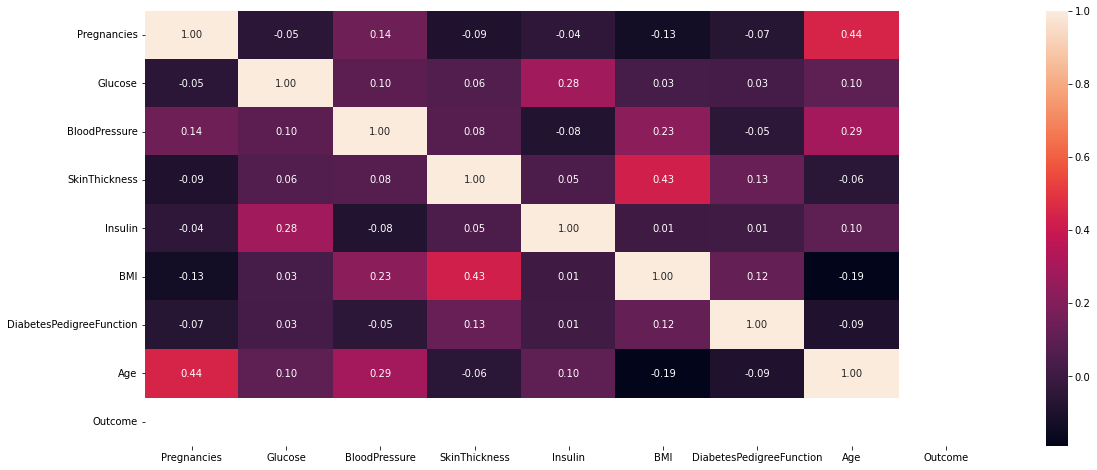

In [30]:
#Plotting the correlation between attributes that corresponds to outcome 1
plt.rcParams['figure.figsize'] = (19, 8)
sns.heatmap(data[data['Outcome']== 1 ].corr(), annot = True, fmt = '0.2f')
plt.show()

In [31]:
#Looking at the distribution of values in each feature that corresponds to the outcome 1 to see if any feature could be misleading 
#for the further analysis and also to see the range of values and to check if there are any outliers
df1 = data[data['Outcome']==1]['Glucose']
df2 = data[data['Outcome']==1]['BMI']
df3 = data[data['Outcome']==1]['Insulin']
df4 = data[data['Outcome']==1]['DiabetesPedigreeFunction']
df5 = data[data['Outcome']==1]['Age']
df6 = data[data['Outcome']==1]['BloodPressure']
df7 = data[data['Outcome']==1]['Pregnancies']
df8 = data[data['Outcome']==1]['SkinThickness']

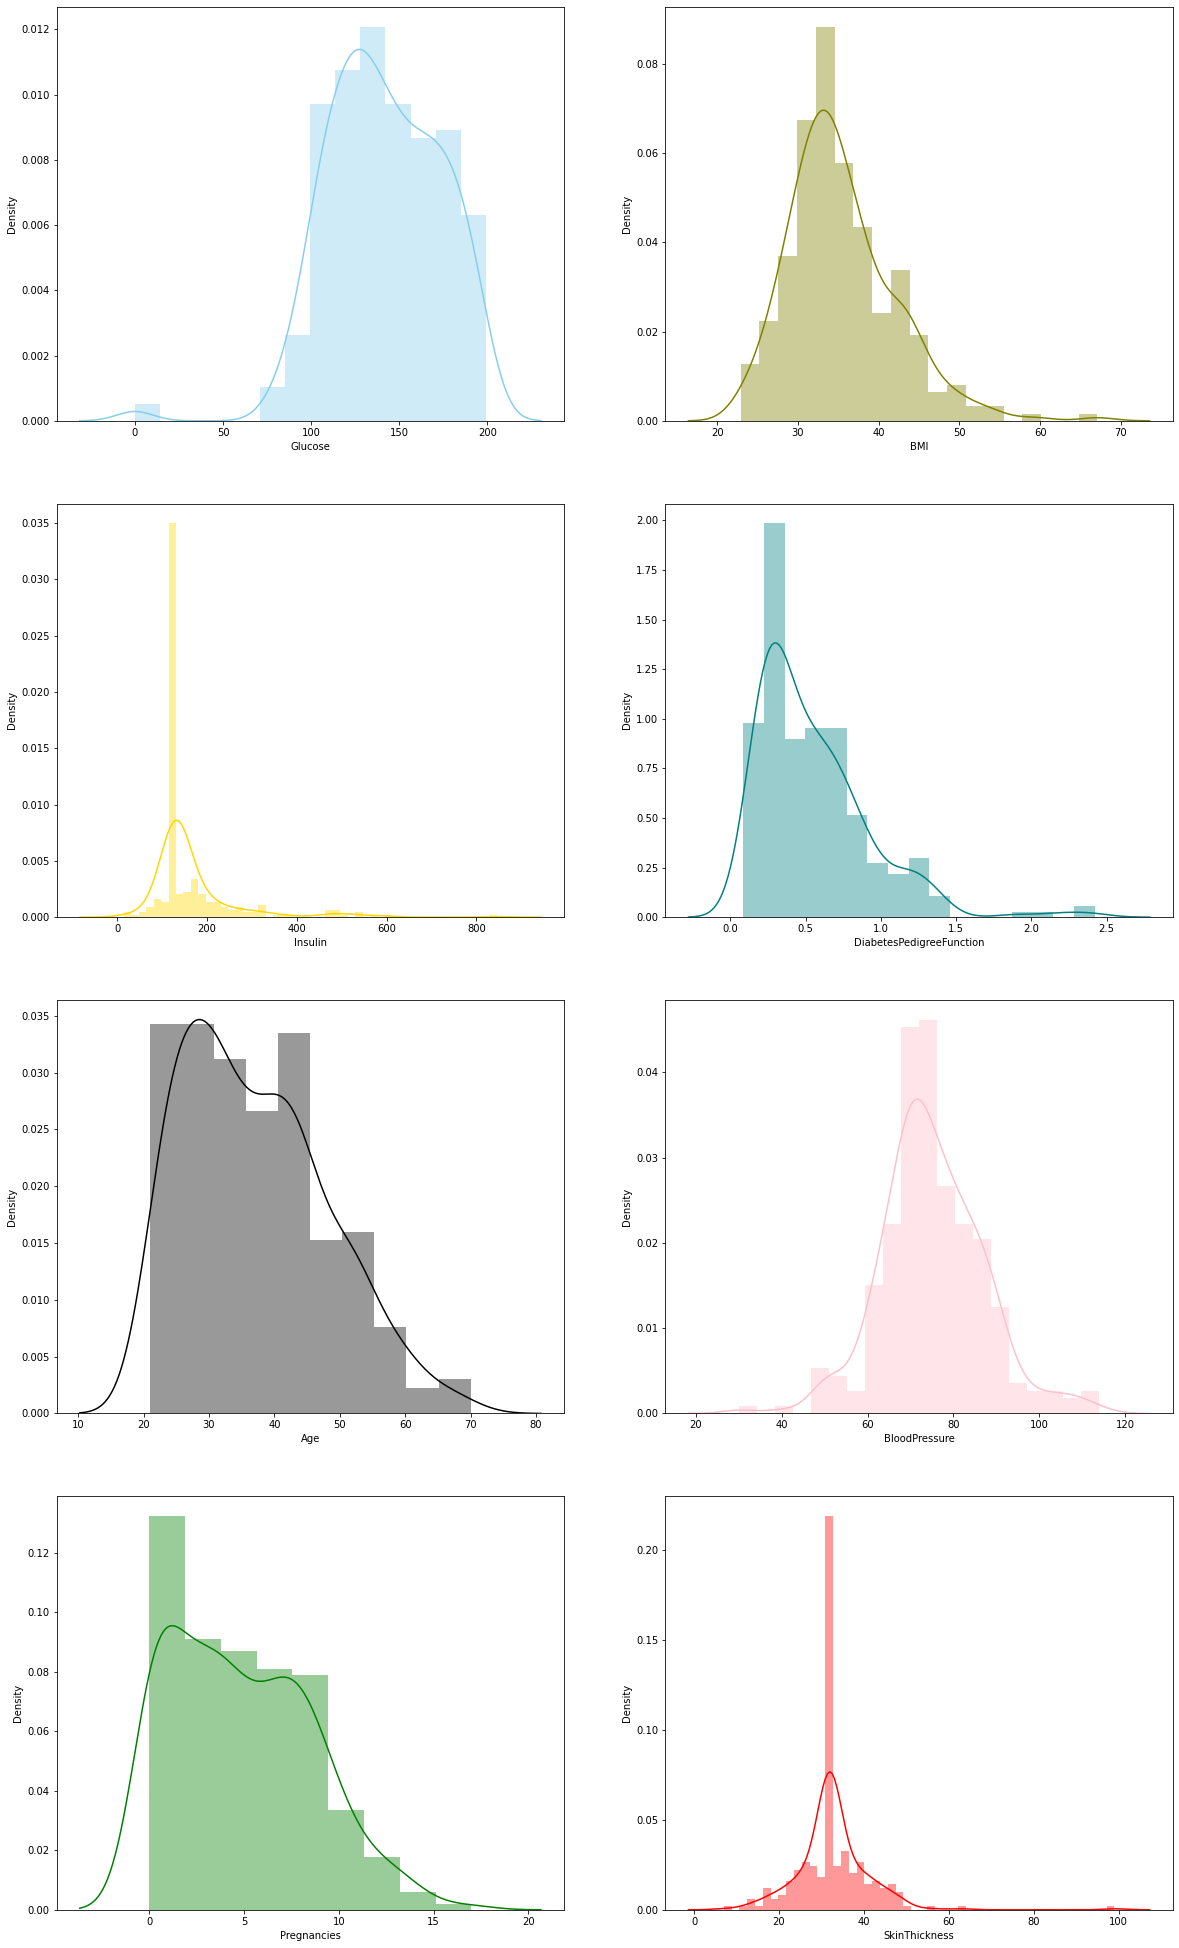

In [32]:
#Looking at the distribution of values in each feature that corresponds to the outcome 1 to see if any feature could be misleading 
#for the further analysis and also to see the range of values and to check if there are any outliers
df1 = data[data['Outcome']==1]['Glucose']
df2 = data[data['Outcome']==1]['BMI']
df3 = data[data['Outcome']==1]['Insulin']
df4 = data[data['Outcome']==1]['DiabetesPedigreeFunction']
df5 = data[data['Outcome']==1]['Age']
df6 = data[data['Outcome']==1]['BloodPressure']
df7 = data[data['Outcome']==1]['Pregnancies']
df8 = data[data['Outcome']==1]['SkinThickness']

fig, axs = plt.subplots(4, 2, figsize=(20, 35))

sns.distplot(a= df1, kde=True, color="skyblue", ax=axs[0, 0])
sns.distplot(a= df2, kde=True, color="olive", ax=axs[0, 1])
sns.distplot(a= df3, kde=True, color="gold", ax=axs[1, 0])
sns.distplot(a= df4, kde=True, color="teal", ax=axs[1, 1])
sns.distplot(a= df5, kde=True, color="black", ax=axs[2, 0])
sns.distplot(a= df6, kde=True, color="pink", ax=axs[2, 1])
sns.distplot(a= df7, kde=True, color="green", ax=axs[3, 0])
sns.distplot(a= df8, kde=True, color="red", ax=axs[3, 1])

In [33]:
#Statistics of the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.281250,72.394531,29.632812,135.424479,32.453255,0.471876,33.240885,0.348958
std,3.369578,31.093526,12.103932,8.837992,87.901788,6.875366,0.331329,11.760232,0.476951
min,0.000000,0.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,105.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.000000,105.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d26809350>,
      dtype=object)

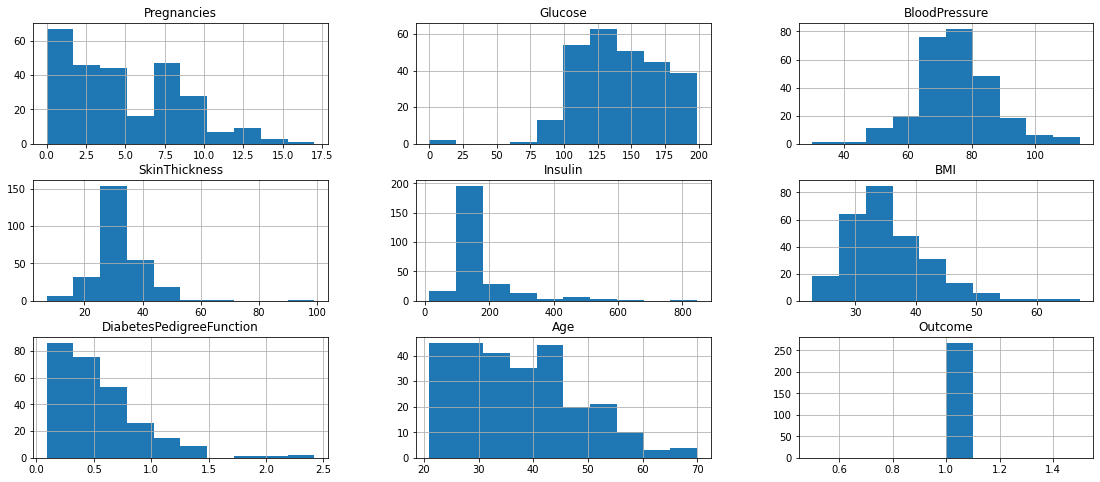

In [34]:
#Plotting the value counts for all features which corresponds to otcome 1 to see if we can find any trend
data[data['Outcome'] == 1].hist()

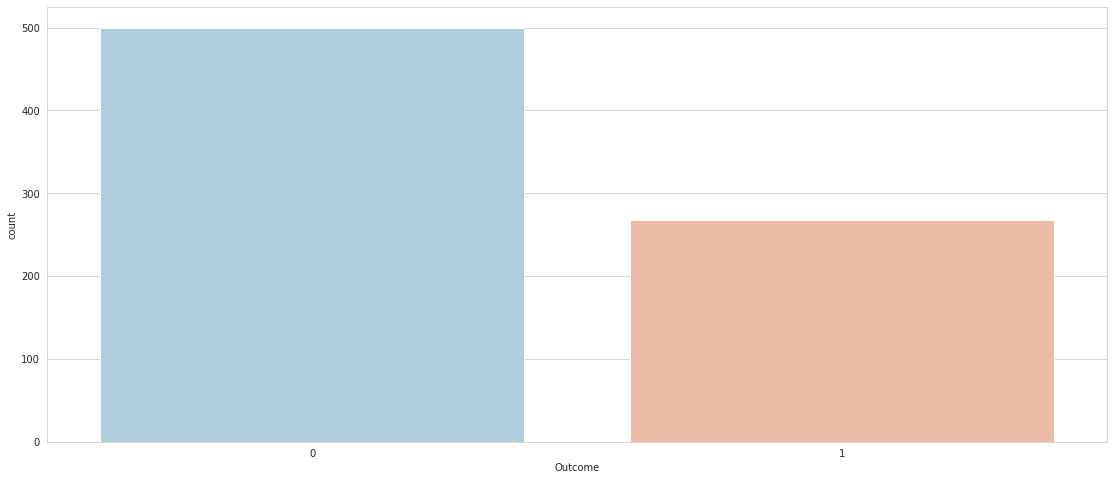

In [35]:
#Checking for the balance between two classes
sns.set_style('whitegrid')
sns.countplot(data = data, x = 'Outcome', palette = 'RdBu_r')

In [36]:
#ratio between the two classes
balance = data['Outcome'].value_counts()
ratio = round(balance[0]/balance[1])
ratio

2

In [37]:
#percent of records that corresponds to outcome 0 and one respectively
round((balance[0]*100)/(balance[0]+balance[1])),round((balance[1]*100)/(balance[0]+balance[1]))

(65, 35)

In [38]:
#checking for duplicate records in the dataset
duplicate = data[data.duplicated()]
duplicate

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [39]:
#For XGB, AdaBoost,Gradient Boost, Random Forest Classification respectively
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

#To measure the performance metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#splitting the dataset to train and test splits
from sklearn.model_selection import train_test_split

#To oversample the dataset
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

In [40]:
#splitting the dataset features and target
x = data.iloc[:,0:8]
y = data.iloc[:,-1]

In [41]:
#checking out the first five records of x and y respectively
x.head(),y.head()

(    Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
 1             1       85             66  ...  26.6                     0.351   31
 3             1       89             66  ...  28.1                     0.167   21
 5             5      116             74  ...  25.6                     0.201   30
 7            10      115             74  ...  35.3                     0.134   29
 10            4      110             92  ...  37.6                     0.191   30
 
 [5 rows x 8 columns], 1     0
 3     0
 5     0
 7     0
 10    0
 Name: Outcome, dtype: int64)

In [42]:
#splitting the dataset into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

In [43]:
#Checking out the trai and test sets
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((614, 8), (154, 8), (614,), (154,))

In [44]:
#oversampling the data
rasam = RandomOverSampler(random_state=0)
rasam.fit(x, y)

RandomOverSampler(random_state=0, ratio=None, return_indices=False,
                  sampling_strategy='auto')

In [45]:
#getting the balanced x and y sets
xres, yres = rasam.fit_sample(x, y)

In [48]:

xtrain, xtest, ytrain, ytest = train_test_split(xres, yres, test_size=0.2, random_state=0)

In [49]:
#Fitting XGB Classifier into our training data
xgclassifier = XGBClassifier(booster='gbtree', eta=0.07, max_depth=7, seed=0, subsample = 0.5)
xgclassifier.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.07, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              silent=None, subsample=0.5, verbosity=1)

In [50]:
#Making the predictions for the test set 
ypred = xgclassifier.predict(xtest)
ypred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0])

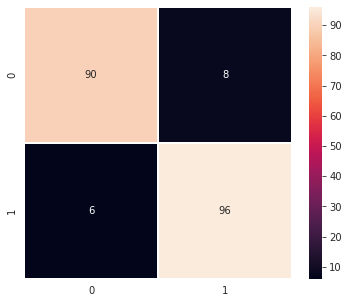

In [51]:
#Plotting the confusion matrix
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize = (6,5))
ax = sns.heatmap(cm, annot=True, linewidths=.5)

In [52]:
#Printing the measured performance metrics
print(accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

0.93
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        98
           1       0.92      0.94      0.93       102

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



In [53]:
#Fitting random forest Classifier into our training data 

randfor = RandomForestClassifier()
randfor.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
#Making the predictions for the test set
ypred = randfor.predict(xtest)
ypred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0])

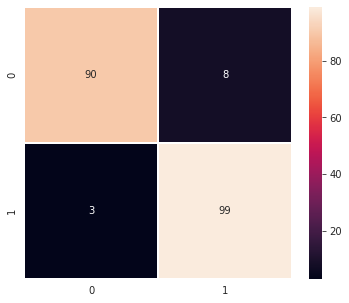

In [55]:
#Plotting the confusion matrix
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize = (6,5))
ax = sns.heatmap(cm, annot=True, linewidths=.5)

In [56]:
#Printing the measured performance metrics
print(accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

0.945
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        98
           1       0.93      0.97      0.95       102

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



In [57]:
#Fitting AdaBoost Classifier into our training data 
adaclassifier = AdaBoostClassifier(n_estimators=160, learning_rate=0.5, random_state=0)
adaclassifier.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=160, random_state=0)

In [58]:
#Making the predictions for the test set
ypred = adaclassifier.predict(xtest)
ypred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0])

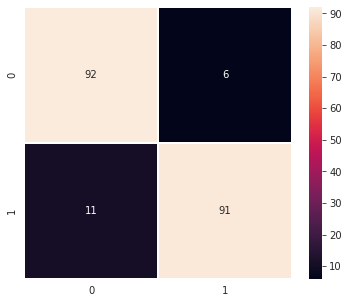

In [59]:
#Plotting the confusion matrix
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize = (6,5))
ax = sns.heatmap(cm, annot=True, linewidths=.5)

In [60]:
#Printing the measured performance metrics
print(accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))


0.915
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        98
           1       0.94      0.89      0.91       102

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200



In [61]:
#Fitting gradient boost Classifier into our training data 
gradclassifier = GradientBoostingClassifier(min_samples_split = 2, max_depth = 7, max_features = None, n_estimators=210, learning_rate=0.05, random_state=0)
gradclassifier.fit(xtrain, ytrain)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=210,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:
#Making the predictions for the test set
ypred = gradclassifier.predict(xtest)
ypred

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0])

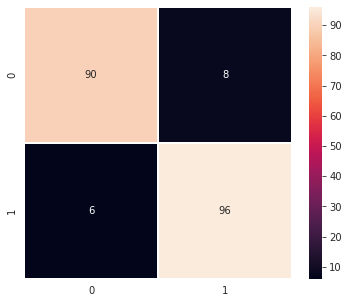

In [63]:
#Plotting the confusion matrix
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize = (6,5))
ax = sns.heatmap(cm, annot=True, linewidths=.5)

In [64]:
#Printing the measured performance metrics
print(accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

0.93
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        98
           1       0.92      0.94      0.93       102

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



# ***We can see that XGBoost and Random forest works really well for our data with the f1-score around 94%***